In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras import datasets,layers

In [7]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [8]:
xtrain.shape

(50000, 32, 32, 3)

In [9]:
xtest.shape

(10000, 32, 32, 3)

In [11]:
xtrain[0].shape

(32, 32, 3)

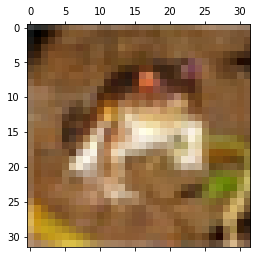

In [12]:
plt.matshow(xtrain[0])

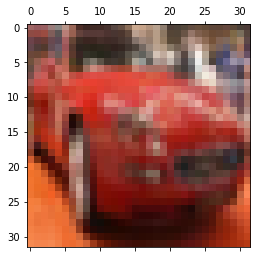

In [14]:
plt.matshow(xtrain[5])

In [16]:
ytrain[5]

array([1], dtype=uint8)

In [18]:
ytrain=ytrain.reshape(len(ytrain))

In [19]:
ytrain

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [21]:
xtrain=xtrain/255
ytrain=ytrain/255
print(xtrain.shape,ytrain.shape)

(50000, 32, 32, 3) (50000,)


In [28]:
ann=keras.Sequential([keras.layers.Flatten(input_shape=[32,32,3]),
                     keras.layers.Dense(3000,activation='relu'),
                     keras.layers.Dense(1000,activation='relu'),
                     keras.layers.Dense(10,activation='softmax')])

In [30]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3780 - accuracy: 0.0980
Epoch 2/5
1563/1563 [==============================] - 69s 44ms/step - loss: 0.0017 - accuracy: 0.0995
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 7.7461e-04 - accuracy: 0.0996
Epoch 4/5
1563/1563 [==============================] - 69s 44ms/step - loss: 4.8714e-04 - accuracy: 0.0996
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 3.5011e-04 - accuracy: 0.0994


In [32]:
cnn = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.1074 - accuracy: 0.1008
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3353e-08 - accuracy: 0.0989
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2155e-08 - accuracy: 0.1001
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 7.8457e-09 - accuracy: 0.0991
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1007
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1003
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0995
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1006
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0999
Epoch 10/10
1563/1563 [=========

In [38]:
cnn.evaluate(xtest,ytest)

313/313 [==============================] - 2s 6ms/step - loss: 65930.6172 - accuracy: 0.1000


[65930.6171875, 0.10000000149011612]

In [40]:
y_pred = cnn.predict(xtest)
y_pred[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

In [43]:
ytest[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)